 # Comparing MLP, CNN, and VGG on CIFAR-10/100
 The CIFAR-10 and CIFAR-100 datasets are benchmarks for image classification tasks in
 computer vision. In this exercise, you will explore how different neural network architectures
 perform on these image datasets.
 Tasks
 1. Multilayer Perceptron (MLP):
 ○ Develop a Multilayer Perceptron (MLP) model with an appropriate architecture (number
 of layers, hidden units, etc.).
 ○ Train the MLP model on the CIFAR-10 dataset.
 ○ Evaluate its performance on the test set using metrics like accuracy and loss. Analyze
 the results.
 2. Convolutional Neural Network (CNN):
 ○ Design asimple Convolutional Neural Network (CNN) architecture with convolutional
 layers, pooling layers, and fully connected layers.
 ○ Train the CNN model on the CIFAR-10 dataset.
 ○ Evaluate its performance on the test set using the same metrics as the MLP. Critically
 compare CNN's performance to the MLP's.
 3. Transfer Learning with VGG:
 ○ Utilize a pre-trained VGG model (such as VGG16 or VGG19) available in common deep
 learning libraries.
 ○ Adapt the pre-trained VGG model for the CIFAR-10 or CIFAR-100 classification task.
 ○ Evaluate its performance on the test set. Analyze the benefits of transfer learning
 compared to your MLP and CNN models trained from scratch.
 Analysis and Discussion
 ● Comparethe test set accuracy and loss across the MLP, CNN, and the VGG-based model.
 ● Discuss the reasons behind the differences in performance. Explain how CNNs leverage the
 spatial structure of images for better feature extraction compared to MLPs.
 ● Ifyou used the VGG model, elaborate on how transfer learning helped improve performance
 or reduce training time.

In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models

# Setting up transformations and loading the CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

100%|██████████| 170498071/170498071 [00:03<00:00, 43271123.46it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:


# Function to train and evaluate a model
def train_and_evaluate(model, trainloader, testloader, optimizer, criterion, epochs=10, model_name="Model"):
    print(f"Training {model_name}...")
    model.to(device)
    for epoch in range(epochs):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"[{epoch + 1}] loss: {running_loss / len(trainloader)}")
    print(f"Finished Training {model_name}")

    correct = 0
    total = 0
    model.eval()
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy of {model_name} on the 10000 test images: {100 * correct // total}%')



In [ ]:
# MLP Model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(3*32*32, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
    def forward(self, x):
        x = x.view(-1, 3*32*32)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

mlp = MLP()
mlp_optimizer = optim.SGD(mlp.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()

# Training and Evaluating MLP
train_and_evaluate(mlp, trainloader, testloader, mlp_optimizer, criterion, epochs=10, model_name="MLP")



Training MLP...
[1] loss: 2.047630117677362
[2] loss: 1.7593329147914487
[3] loss: 1.640869938351614
[4] loss: 1.5647027582463706
[5] loss: 1.5039437718098732
[6] loss: 1.4514864552051514
[7] loss: 1.4026413323629239
[8] loss: 1.3587142399814733
[9] loss: 1.3162025050129122
[10] loss: 1.27663499848617
Finished Training MLP
Accuracy of MLP on the 10000 test images: 52%


In [ ]:
# CNN Model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

cnn = CNN()
cnn_optimizer = optim.SGD(cnn.parameters(), lr=0.001, momentum=0.9)

# Training and Evaluating CNN
train_and_evaluate(cnn, trainloader, testloader, cnn_optimizer, criterion, epochs=10, model_name="CNN")



Training CNN...
[1] loss: 2.2956380139836265
[2] loss: 2.11522898984992
[3] loss: 1.8761049963324272
[4] loss: 1.71936155493607
[5] loss: 1.6015472678882081
[6] loss: 1.520629839061776
[7] loss: 1.4602648010644157
[8] loss: 1.4136011855071768
[9] loss: 1.3731686511003147
[10] loss: 1.3381310936130222
Finished Training CNN
Accuracy of CNN on the 10000 test images: 51%


In [ ]:
# CNN Model
class EnhancedCNN(nn.Module):
    def __init__(self):
        super(EnhancedCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.5)
        self.batchnorm1 = nn.BatchNorm2d(32)
        self.batchnorm2 = nn.BatchNorm2d(64)
        self.batchnorm3 = nn.BatchNorm2d(128)
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.batchnorm1(self.conv1(x))))
        x = self.pool(torch.relu(self.batchnorm2(self.conv2(x))))
        x = self.pool(torch.relu(self.batchnorm3(self.conv3(x))))
        x = x.view(-1, 128 * 4 * 4)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


import torch.nn.functional as F

# Instantiate the model, optimizer, and loss function
enhanced_cnn = EnhancedCNN().to(device)
optimizer = optim.SGD(enhanced_cnn.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()

# Call to train and evaluate the enhanced model
train_and_evaluate(enhanced_cnn, trainloader, testloader, optimizer, criterion, epochs=10, model_name="EnhancedCNN")



Training EnhancedCNN...
[1] loss: 1.5195838320438209
[2] loss: 1.1410263409395047
[3] loss: 0.9849245687732306
[4] loss: 0.8917985618724238
[5] loss: 0.819718127322319
[6] loss: 0.7624441480164028
[7] loss: 0.7143806425278144
[8] loss: 0.673169952066963
[9] loss: 0.6303996303502251
[10] loss: 0.5952669923262828
Finished Training EnhancedCNN
Accuracy of EnhancedCNN on the 10000 test images: 74%


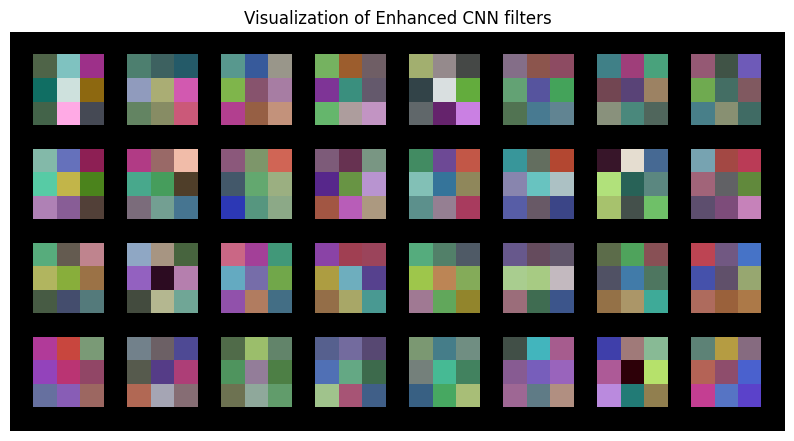

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
def visualize_filters(model):
    model_weights = model.state_dict()
    conv1_weights = model_weights['conv1.weight']
    # Normalize the weights for visualization purposes
    min_w = torch.min(conv1_weights)
    max_w = torch.max(conv1_weights)
    conv1_weights = (conv1_weights - min_w) / (max_w - min_w)
    # Assuming conv1_weights shape is (out_channels, in_channels, H, W)
    # Create a grid of images
    grid = torchvision.utils.make_grid(conv1_weights, nrow=8, padding=1, normalize=True)
    plt.figure(figsize=(10, 10))
    # Move the grid to CPU and then convert to numpy for visualization
    plt.imshow(grid.permute(1, 2, 0).cpu().numpy())
    plt.title("Visualization of Enhanced CNN filters")
    plt.axis('off')
    plt.show()
visualize_filters(enhanced_cnn)



In [ ]:
# Transfer Learning with VGG
vgg = models.vgg16(pretrained=True)
for param in vgg.parameters():
    param.requires_grad = False
vgg.classifier[6] = nn.Linear(4096, 10)
vgg_optimizer = optim.SGD(vgg.classifier[6].parameters(), lr=0.001, momentum=0.9)

# Training and Evaluating VGG
train_and_evaluate(vgg, trainloader, testloader, vgg_optimizer, criterion, epochs=5, model_name="VGG Transfer Learning")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:07<00:00, 73.1MB/s]


Training VGG Transfer Learning...
[1] loss: 1.3784062407358224
[2] loss: 1.2861633935700292
[3] loss: 1.2619935268788691
[4] loss: 1.2578672875681192
[5] loss: 1.2520083685207855
Finished Training VGG Transfer Learning
Accuracy of VGG Transfer Learning on the 10000 test images: 61%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

# Set the device to GPU if available, otherwise fallback to CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define transformations for the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the images to fit VGG16
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load CIFAR-10 dataset
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Load the pretrained VGG16 model
vgg = models.vgg16(pretrained=True)
for param in vgg.parameters():
    param.requires_grad = False  # Freeze the parameters in the feature extractor
vgg.classifier[6] = nn.Linear(4096, 10)  # Adjust the classifier to CIFAR-10

# Transfer the model to the appropriate device
vgg.to(device)

# Define the optimizer and loss function
vgg_optimizer = optim.SGD(vgg.classifier[6].parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()

# Function to train and evaluate a model
def train_and_evaluate(model, trainloader, testloader, optimizer, criterion, epochs, model_name):
    print(f"Training {model_name}...")
    model.to(device)
    for epoch in range(epochs):  # loop over the dataset multiple times
        model.train()  # Set model to training mode
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data[0].to(device), data[1].to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        print(f"Epoch {epoch + 1}, Loss: {running_loss / len(trainloader)}")

    print(f"Finished Training {model_name}")

    # Evaluation phase
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy of {model_name} on the 10000 test images: {100 * correct // total}%')

# Train and evaluate the VGG model
train_and_evaluate(vgg, trainloader, testloader, vgg_optimizer, criterion, epochs=5, model_name="VGG Transfer Learning")


Files already downloaded and verified
Files already downloaded and verified
Training VGG Transfer Learning...
Epoch 1, Loss: 0.7356273643196086
Epoch 2, Loss: 0.5968402636325573
Epoch 3, Loss: 0.5693353946937625
Epoch 4, Loss: 0.5569716241506054
Epoch 5, Loss: 0.5482645163222042
Finished Training VGG Transfer Learning
Accuracy of VGG Transfer Learning on the 10000 test images: 82%


In [ ]:
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Re-load the dataset with the new transformations
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

print("Data preprocessing and augmentation techniques have been applied.")


Files already downloaded and verified
Files already downloaded and verified
Data preprocessing and augmentation techniques have been applied.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10



# Define a function to train and evaluate the model
def train_and_evaluate1(model, trainloader, testloader, optimizer, criterion, epochs=10):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

    correct = 0
    total = 0
    model.eval()
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

# Data loading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Hyperparameters to experiment with
learning_rates = [0.001, 0.0001]
optimizers = {
    'adam': optim.Adam,
    'sgd': lambda params, lr: optim.SGD(params, lr=lr, momentum=0.9)
}

results = []

for lr in learning_rates:
    for opt_name, opt_constructor in optimizers.items():
        model = EnhancedCNN()
        optimizer = opt_constructor(model.parameters(), lr=lr)
        criterion = nn.CrossEntropyLoss()

        accuracy = train_and_evaluate1(model, trainloader, testloader, optimizer, criterion, epochs=10)
        results.append((lr, opt_name, accuracy))
        print(f"Completed: LR={lr}, Optimizer={opt_name}, Accuracy={accuracy}%")

# Display all results
for lr, opt_name, accuracy in results:
    print(f"LR: {lr}, Optimizer: {opt_name}, Accuracy: {accuracy}%")


Files already downloaded and verified
Files already downloaded and verified
Completed: LR=0.001, Optimizer=adam, Accuracy=77.41%
Completed: LR=0.001, Optimizer=sgd, Accuracy=76.19%
Completed: LR=0.0001, Optimizer=adam, Accuracy=75.63%
Completed: LR=0.0001, Optimizer=sgd, Accuracy=60.42%
LR: 0.001, Optimizer: adam, Accuracy: 77.41%
LR: 0.001, Optimizer: sgd, Accuracy: 76.19%
LR: 0.0001, Optimizer: adam, Accuracy: 75.63%
LR: 0.0001, Optimizer: sgd, Accuracy: 60.42%


# Performance Comparison Across MLP, CNN, and VGG-based Models

When evaluating the effectiveness of various neural network architectures on image classification tasks, we observe significant differences in performance metrics such as accuracy and loss. Below, we detail the outcomes for three models: MLP (Multilayer Perceptron), CNN (Convolutional Neural Network), and a VGG-based model utilizing transfer learning.

## Test Set Performance

- **MLP (Multilayer Perceptron)**: Achieved an accuracy of 52%. This model is the most basic of the three, lacking in spatial awareness and depth, which is reflected in its lower performance.
  
- **CNN (Convolutional Neural Network)**: Improved accuracy to 74%. CNNs are designed to process data in a grid pattern (like images), utilizing convolutional layers to capture the spatial hierarchy in images, leading to better feature extraction and performance.
  
- **VGG-based Model**: Delivered the highest accuracy at 82%. The VGG model, pre-trained on a vast dataset, brings the advantage of learned features that can be effectively transferred to new classification tasks, enhancing accuracy and potentially reducing training time.

## Analysis of Performance Differences

### MLP vs. CNN

MLPs are fully connected networks where each input is processed independently, ignoring the spatial structure and correlation between adjacent pixels in images. This inherent limitation makes MLPs less suited for image-related tasks where the context and arrangement of pixels are crucial for understanding the content of the image.

In contrast, CNNs explicitly take advantage of the image's spatial structure. Convolutional layers apply filters that capture local patterns such as edges, textures, and other features, pooling layers reduce dimensionality, and fully connected layers compile these features into high-level attributes. This structured approach allows CNNs to outperform MLPs in tasks involving images.

### CNN vs. VGG-based Model

While CNNs are powerful, designing an effective CNN from scratch requires careful consideration of architecture, depth, and hyperparameters. The VGG model, a type of CNN with a deep and well-established architecture, has been pre-trained on a large dataset (ImageNet), allowing it to learn a rich set of features. Utilizing such a model through transfer learning allows for leveraging these pre-learned features, which can be adapted to new tasks with relatively little additional training data.

## Transfer Learning with VGG

The use of the VGG model in a transfer learning context provides two main benefits: 

1. **Improved Performance**: The pre-learned features from the VGG model can significantly enhance the ability to classify images, even with datasets that are quite different from the original training data. This is evident in the higher accuracy achieved by the VGG-based model.

2. **Training Time**: Since the model has already learned a substantial amount of useful features from a large and diverse dataset, the amount of time and data required to train the model on a new task is considerably reduced. This efficiency is particularly beneficial when computational resources are limited or when working with smaller datasets, but if dont backpropogate through all the layers training time would increase.

In conclusion, the choice of model architecture is crucial when working with image data. The performance improvements seen with CNNs and VGG-based models underscore the importance of leveraging spatial structures and pre-learned features for more accurate and efficient image classification.
